In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [8]:
analyzer = SentimentIntensityAnalyzer()

In [9]:
import spacy
import gensim
nlp = spacy.load('en_core_web_sm')
from spacy import displacy
import pandas as pd
from nltk.corpus import wordnet
import nltk
from nltk.corpus import stopwords
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import spacy
import gensim
nlp = spacy.load('en_core_web_sm')
from spacy import displacy
import pandas as pd
from nltk.corpus import wordnet
import nltk
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt

In [11]:
col_names = ["user", "date", "rating", "title", "content"]
df = pd.read_csv('C:\\Users\ACER\\Documents\\ta\\Review Per Hotel\\Bintang 5\lotte.csv', sep=';')
df = df.rename(columns={'user ': 'user'})
df = df.rename(columns={'date ': 'date'})
df = df.rename(columns={'rating ': 'rating'})
df = df.rename(columns={'title ': 'title'})
df = df.rename(columns={'content ': 'content'})

In [12]:
df['content']=df['content'].str.lower()
df['title']=df['title'].str.lower()

# Dimensi Sincerity

In [13]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsinc1 = ["involved", "alone", "after", "stated", "embarrassing","lost", "together", "angry", "through", "continued", "honest", "reliable", "true", "fair"]
excluded_sentences = ["lotte new york palace hotel location very good 10 min walk from tome square, lots of close breakfast area around central park is close as well , high end brands is around the corner , several coffee shops around the corner as well as starbucks not bad experience ,entrance not so fancy the staff at the entrance very friendly , crowded, the coffee area regular the higher the room the less is the nose , the room is quite good for 3 room aminities no slippers nor body cream supplys are from moltin brown , i was on hold calling the reception from my room for over 15 min yet they didn’t pick up ,reception is rude very rude check in process good double bed room wide check out process mot bad again the guys at the entrance are very friendly price high", "good location but encounter a multitude of problems, that still surprise me for what it seemed a good hotel.", "the coffee corner downstairs offers great breakfast treats, and the lounge bar is a good place to sit and relax, although traffic in the hotel is high.", " the courtyard outside is a good place to relax and meet friends.", "drinks are a little pricey in hotel, as is the menu generally, but on a par with a good london hotel."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsinc1:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

a true 5 stars hotel, great location, spacious room with comfortable beds and a great view of saint patrick's church from the windows, wonderful service and they even took us to the 42nd floor suite to see the view . {'neg': 0.0, 'neu': 0.66, 'pos': 0.34, 'compound': 0.9584} positive
 of course, at a true luxury property, even if there were no rooms available at the next category, because its own reservation website says otherwise, one option would have been to upgrade me to the next room category. {'neg': 0.054, 'neu': 0.878, 'pos': 0.068, 'compound': 0.1531} positive
perhaps in 1994 it was a luxury hotel, but if you've stayed in a true luxury hotel you realize quickly that this hotel doesn't qualify. {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.5719} positive
a true luxury hotel should include this instead of nickel and dimeing for every little thing. {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.4215} positive
Total positif: 4
Total negatif: 0
Total neutral: 0


In [11]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsinc2 = ["female", "addressed", "assisted", "required", "telling", "greek", "scheduled", "spoken", "individual", "sincere", "solemn"]
excluded_sentences = ["lotte new york palace hotel location very good 10 min walk from tome square, lots of close breakfast area around central park is close as well , high end brands is around the corner , several coffee shops around the corner as well as starbucks not bad experience ,entrance not so fancy the staff at the entrance very friendly , crowded, the coffee area regular the higher the room the less is the nose , the room is quite good for 3 room aminities no slippers nor body cream supplys are from moltin brown , i was on hold calling the reception from my room for over 15 min yet they didn’t pick up ,reception is rude very rude check in process good double bed room wide check out process mot bad again the guys at the entrance are very friendly price high", "good location but encounter a multitude of problems, that still surprise me for what it seemed a good hotel.", "the coffee corner downstairs offers great breakfast treats, and the lounge bar is a good place to sit and relax, although traffic in the hotel is high.", " the courtyard outside is a good place to relax and meet friends.", "drinks are a little pricey in hotel, as is the menu generally, but on a par with a good london hotel."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsinc2:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

the internet at a recent greek hotel was free and worked everywhere with superb speed. {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.8126} positive
Total positif: 1
Total negatif: 0
Total neutral: 0


In [14]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsinc3 = ["solid", "unique", "advertised", "palatial", "positive", "tremendous", "highest", "extraordinary", "geared", "spoiled", "real", "existent", "actual", "genuine", "substantial", "material"]
excluded_sentences = ["lotte new york palace hotel location very good 10 min walk from tome square, lots of close breakfast area around central park is close as well , high end brands is around the corner , several coffee shops around the corner as well as starbucks not bad experience ,entrance not so fancy the staff at the entrance very friendly , crowded, the coffee area regular the higher the room the less is the nose , the room is quite good for 3 room aminities no slippers nor body cream supplys are from moltin brown , i was on hold calling the reception from my room for over 15 min yet they didn’t pick up ,reception is rude very rude check in process good double bed room wide check out process mot bad again the guys at the entrance are very friendly price high", "good location but encounter a multitude of problems, that still surprise me for what it seemed a good hotel.", "the coffee corner downstairs offers great breakfast treats, and the lounge bar is a good place to sit and relax, although traffic in the hotel is high.", " the courtyard outside is a good place to relax and meet friends.", "drinks are a little pricey in hotel, as is the menu generally, but on a par with a good london hotel."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsinc3:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

the palace is such an unique property. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
this one was in his actual hotel?? {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
the staff is most professional, friendly and polite.we loved having breakfast in a palatial dining room. {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.8115} positive
with each stay, we are more endeared to our 'home away from home'...not only because of the beautifully outstanding hotel, but because of the remarkable, genuine, caring staff: becky hubbard, victor caguindagan, franchesca, ray anis, miles gomez, mike murray, louis, fran, george, batan, olga, teresa, michael, albert, manny, salah, nana, maurice and papa. {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9331} positive
my one daughter says, "we see them more than we see some real family members." {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
a real 4 star hotel in nyc. {'neg': 0.0, 'neu': 1.0, 'pos':

In [13]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsinc4 = ["golden", "built", "unbelievable", "private", "weather", "exclusive", "closing", "blind", "asleep", "older", "original"]
excluded_sentences = ["especially the bar was a real highlight (golden room) and we had the opportunity to try some of the signature cocktails."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsinc4:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

he showed us and 2 other couples the original dining room and sitting room as well. {'neg': 0.0, 'neu': 0.761, 'pos': 0.239, 'compound': 0.5267} positive
it is an older hotel so if modern is your preference then this isn't the spot but if you love old world charm and quintessential manhattan then this is it. {'neg': 0.0, 'neu': 0.75, 'pos': 0.25, 'compound': 0.8847} positive
exhausted from the drive we took the original room. {'neg': 0.212, 'neu': 0.593, 'pos': 0.195, 'compound': -0.0516} negative
 the reception area was lovely , the bar areas were just lush, esp the golden room and the whiskey room was so tranquil , decor was just spot on but not ott, certainly made you you feel you were in an authentic ny hotel . {'neg': 0.053, 'neu': 0.87, 'pos': 0.077, 'compound': 0.0398} positive
stayed at the lotte ny palace as our original hotel cancelled our reservation and placed us here. {'neg': 0.104, 'neu': 0.777, 'pos': 0.119, 'compound': 0.0772} positive
the original property is like walk

In [14]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsinc5 = ["smiling", "hospitable", "responsive", "thorough", "patient", "matt", "caring", "personable", "informative", "thoughtful", "cheerful", "upbeat"]
excluded_sentences = ["especially the bar was a real highlight (golden room) and we had the opportunity to try some of the signature cocktails."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsinc5:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

thanks very caring staff overall {'neg': 0.0, 'neu': 0.319, 'pos': 0.681, 'compound': 0.7501} positive
i appreciate the very personable doormen that are so cheerful & helpful! {'neg': 0.0, 'neu': 0.46, 'pos': 0.54, 'compound': 0.8897} positive
very informative staff on the front desk and great service. {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249} positive
with each stay, we are more endeared to our 'home away from home'...not only because of the beautifully outstanding hotel, but because of the remarkable, genuine, caring staff: becky hubbard, victor caguindagan, franchesca, ray anis, miles gomez, mike murray, louis, fran, george, batan, olga, teresa, michael, albert, manny, salah, nana, maurice and papa. {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.9331} positive
our suite was amazing- grand scale, luxury finishes and attentive, personable staff. {'neg': 0.0, 'neu': 0.595, 'pos': 0.405, 'compound': 0.7783} positive
staff exceptionally responsive and professio

In [16]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsinc6 = ["accommodating", "courteous", "attentive", "professional", "welcoming", "pleasant", "polite", "efficient", "knowledgable", "favorable", "well-disposed"]
excluded_sentences = ["the outside courtyard facing the backside of the catherdral was lovely and a pleasant place to relax and have coffee."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsinc6:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

pleasant staff offered a friendly greeting on every meeting. {'neg': 0.0, 'neu': 0.397, 'pos': 0.603, 'compound': 0.8442} positive
dinner was delicious, beautifully served by attentive staff members. {'neg': 0.0, 'neu': 0.486, 'pos': 0.514, 'compound': 0.8126} positive
excellent location, friendly efficient staff, clean, nicely appointed rooms, good amenities, great views from the room. {'neg': 0.0, 'neu': 0.288, 'pos': 0.712, 'compound': 0.9694} positive
wonderful location at attentive staff. {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'compound': 0.5719} positive
outstanding service by attentive staff in every area. {'neg': 0.0, 'neu': 0.636, 'pos': 0.364, 'compound': 0.6124} positive
lotte palace always does an amazing job offering a luxurious ambience, very professional staff and breathtaking view from the rooms, each room has its own character and feel. {'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'compound': 0.7783} positive
clean, well appointed and a very professional staff. {'neg': 0

the rooms are beautiful, high end bath products, attentive staff and great location without the times square noise. {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.8402} positive
we had a corner cathedral view double overlooking st patrick's ... wonderfully presented hotel amazing g staff very professional ... would return again.... {'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'compound': 0.8271} positive
a professional staff greeted us, displaying high efficiency, courtesy, and the desire to accommodate. {'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'compound': 0.8316} positive
from the moment i arrived to the time i left, i thoroughly enjoyed all the hotel had to offer, perfect location, professional staff and exquisite amenities (gym, restaurants, courtyard). {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.807} positive
friendly, attentive staff from the front desk to housekeeping, all excellent. {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.7845} positive
staff very a

loved everything about it, centrally located, super clean room, very attentive staff. {'neg': 0.0, 'neu': 0.462, 'pos': 0.538, 'compound': 0.8885} positive
Total positif: 84
Total negatif: 1
Total neutral: 9


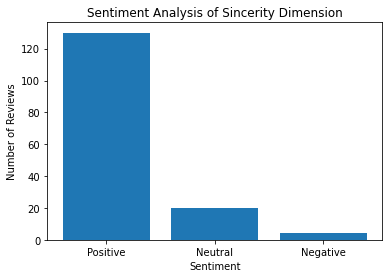

In [25]:
# Set the labels and values for the bar chart
labels = ['Positive', 'Neutral', 'Negative']
values = [130, 20, 4]

# Create the bar chart
plt.bar(labels, values)
plt.title("Sentiment Analysis of Sincerity Dimension")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the bar chart
plt.show()


# Dimensi Excitement

In [17]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordexcite1 = ["most", "prestigious", "classical", "former", "chic", "firm", "global", "preferred", "picky", "tops", "trendy"]
excluded_sentences = ["the outside courtyard facing the backside of the catherdral was lovely and a pleasant place to relax and have coffee."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordexcite1:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

my usual preferred hotel (intercontinental barclay) was fully booked, hence my assistant booked the palace. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
most staff however were quite friendly, ani in concierge recommended one of the best restaurants we dined at during our visit. {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.8588} positive
we chose the lotte new york palace as a preferred hotel for our guests and entire wedding party. {'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'compound': 0.4019} positive
we enjoyed breakfast at the classical lotte's villard room making the morning a very special experience. {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.7425} positive
service was excellent, from the doormen, to reception, to maid service in the rooms -- much as one would expect at the former helmsley palace. {'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'compound': 0.5719} positive
pros: huge room: huge, comfortable bed: amazing mid-town position: beautiful lob

In [18]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordexcite2 = ["rich", "seasonal", "marvelous", "oriental", "significant", "sad", "pet", "pro", "authentic", "picky", "exciting"]
excluded_sentences = ["the outside courtyard facing the backside of the catherdral was lovely and a pleasant place to relax and have coffee."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordexcite2:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

the palace has always been our choice in ny.. i send my daughters and granddaughters to ny on their 16th birthday... the only place i know where safety, elegance, class and service are without question..but this latest experience exceeded all possible expectations with the assistance form a marvelous concierge by the name of ani......she went well beyond what anyone could expect to insure my daughter and granddaughter had a marvelous experience.. {'neg': 0.0, 'neu': 0.807, 'pos': 0.193, 'compound': 0.9413} positive
such a blast at this marvelous hotel. stayed with my family as we booked two rooms at an amazing deal. {'neg': 0.0, 'neu': 0.681, 'pos': 0.319, 'compound': 0.8564} positive
 the reception area was lovely , the bar areas were just lush, esp the golden room and the whiskey room was so tranquil , decor was just spot on but not ott, certainly made you you feel you were in an authentic ny hotel . {'neg': 0.053, 'neu': 0.87, 'pos': 0.077, 'compound': 0.0398} positive
the only thin

In [19]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordexcite3 = ["liked", "fancy", "dark", "functional", "dim", "affordable", "outdated", "congested", "crowded", "plentiful", "cool"]
excluded_sentences = ["the outside courtyard facing the backside of the catherdral was lovely and a pleasant place to relax and have coffee."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordexcite3:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

very small outdated bathroom with shower in the tub. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
we really are low key so don’t need a fancy room. {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353} negative
there was a pokey small dark room next to it where one was supposed to eat. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
very cool place to get a drink before dinner! {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.4376} positive
and what a fancy hotel, especially for the price. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
very well decorated , fancy hotel. {'neg': 0.0, 'neu': 0.676, 'pos': 0.324, 'compound': 0.3384} positive
the lotte was such a cool place to stay. {'neg': 0.0, 'neu': 0.777, 'pos': 0.223, 'compound': 0.3182} positive
i have to sleep in a cool room (63-67 f) to sleep comfortably. {'neg': 0.0, 'neu': 0.683, 'pos': 0.317, 'compound': 0.6249} positive
it is an older hotel, pretty fancy with some beau

In [17]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordexcite4 = ["realized", "gifted", "adult", "medical", "together", "stuffed", "confirmed", "played", "noticed", "engaged", "young"]
excluded_sentences = ["the outside courtyard facing the backside of the catherdral was lovely and a pleasant place to relax and have coffee."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordexcite4:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

Total positif: 0
Total negatif: 0
Total neutral: 0


In [34]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordexcite5 = ["satisfied", "highest", "tremendous", "solid", "extraordinary", "positive", "delightful", "absolute", "familiar", "amazed", "alone", "unique", "unparalleled"]
excluded_sentences = ["the outside courtyard facing the backside of the catherdral was lovely and a pleasant place to relax and have coffee."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordexcite5:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

but the hotel and staff continue to to amaze me each and every time .. straight from arrival greetings from the doormen make you feel at home.. the absolute best concierge staff in the world. {'neg': 0.0, 'neu': 0.651, 'pos': 0.349, 'compound': 0.9559} positive
our absolute favorite hotel! {'neg': 0.0, 'neu': 0.477, 'pos': 0.523, 'compound': 0.5093} positive
the palace is such an unique property. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
the rooms are spacious and modern enough with the absolute biggest most comfiest bed i’ve ever seen let alone slept in and there has been quite a few. {'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'compound': -0.25} negative
i've traveled all over the world, and this is the absolute worst hotel i have ever been to. {'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.6249} negative
delightful staff. {'neg': 0.0, 'neu': 0.208, 'pos': 0.792, 'compound': 0.5859} positive
an absolute 5 star hotel in every category. {'neg': 0.0, 'neu': 1.0

In [35]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordexcite6 = ["thick", "plush", "designed", "living", "attractive", "effective", "premium", "exterior", "extensive", "lush", "contemporary"]
excluded_sentences = ["the outside courtyard facing the backside of the catherdral was lovely and a pleasant place to relax and have coffee."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordexcite6:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

friendly and helpful staff, attractive well-sized room. {'neg': 0.0, 'neu': 0.31, 'pos': 0.69, 'compound': 0.836} positive
initial glitch apart, we could not fault this plush hotel and would not hesitate to recommend it as a great new york tourist base. {'neg': 0.07, 'neu': 0.66, 'pos': 0.27, 'compound': 0.7237} positive
this is a lovely hotel, in a great location and very attractive exterior and little oasis of an romantically lit outdoor forecourt. {'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.9312} positive
very friendly and helpful staff at this premium property. {'neg': 0.0, 'neu': 0.516, 'pos': 0.484, 'compound': 0.762} positive
i requested a renovated room with a view overlooking the famous st patricks cathedral on 5th avenue and while i couldn't wait to join the city outside i found myself equally as happy inside admiring the view, relaxing in their cosy robe, smelling lovely from the molton brown products, and indulging in pure comfort on the beautiful, plush, king si

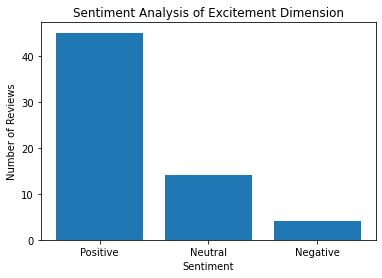

In [26]:
# Set the labels and values for the bar chart
labels = ['Positive', 'Neutral', 'Negative']
values = [45, 14, 4]

# Create the bar chart
plt.bar(labels, values)
plt.title("Sentiment Analysis of Excitement Dimension")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the bar chart
plt.show()

# Dimensi Competence

In [37]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordcomp1 = ["self", "horrible", "serious", "strong", "dingy", "weird", "terrible", "bare", "uncomfortable", "over", "reliable", "honest", "true", "authentic"]
excluded_sentences = ["the outside courtyard facing the backside of the catherdral was lovely and a pleasant place to relax and have coffee."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordcomp1:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

they gave her a terrible room in the back . {'neg': 0.256, 'neu': 0.744, 'pos': 0.0, 'compound': -0.4767} negative
 the reception area was lovely , the bar areas were just lush, esp the golden room and the whiskey room was so tranquil , decor was just spot on but not ott, certainly made you you feel you were in an authentic ny hotel . {'neg': 0.053, 'neu': 0.87, 'pos': 0.077, 'compound': 0.0398} positive
it's not a horrible hotel but when considering the price point and what they're selling themselves as, the lotte does not hold up to its brand and rating. {'neg': 0.0, 'neu': 0.933, 'pos': 0.067, 'compound': 0.2323} positive
so we end up staying in this dirty old weird smelly room but looking at the hallway it was so obvious all the room will be in same condition. {'neg': 0.116, 'neu': 0.884, 'pos': 0.0, 'compound': -0.369} negative
this is a terrible hotel. {'neg': 0.437, 'neu': 0.563, 'pos': 0.0, 'compound': -0.4767} negative
after having a lot of terrible hotel stays in really nice 

In [18]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordcomp2 = ["continued", "unexpected", "giving", "complaining", "noted", "neither", "convinced", "dropping", "sorted", "bothered", "secure", "strong", "safe"]
excluded_sentences = [" the courtyard outside is a good place to relax and meet friends."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordcomp2:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

thank you to all the staff for making us feel so welcomed and for the unexpected room upgrade which genuinely made our trip. {'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'compound': 0.6825} positive
the staff is nice and helpful and it is a very safe place to stay. {'neg': 0.0, 'neu': 0.577, 'pos': 0.423, 'compound': 0.8313} positive
 some of the things we noted on our last visit (in our “upgraded” deluxe room),  - no water bottles in the room - the cold water water faucet was barely more than a fast drip - one of the robes had holes in it (see photo) - the room safe was broken and we had to summon security twice to remove our possessions - one day the maid didn’t leave us any towels - a rather antiquated bath/shower (instead of stall shower) - exorbitantly priced wi-fi for this day and age  the staff are still great and the location is terrific, but unfortunately that’s not enough. {'neg': 0.081, 'neu': 0.847, 'pos': 0.072, 'compound': 0.0} neutral
there is also a large room safe. {'neg':

In [39]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordcomp3 = ["trying", "annoyed", "fixed", "frustated", "granted", "difficult", "off", "connected", "pointed", "pop", "technical", "expert"]
excluded_sentences = [" the courtyard outside is a good place to relax and meet friends."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordcomp3:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

at check in we were given a variety of room options including a higher floor in a connected room but told that these were noisier than others aka don’t make an issue of this later. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
Total positif: 0
Total negatif: 0
Total neutral: 1


In [40]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordcomp4 = ["learned", "frequent", "gone", "cutting", "unacceptable", "oriental", "competitive", "worst", "significant", "aware", "corporate", "bodied", "embodied", "incorporated"]
excluded_sentences = [" the courtyard outside is a good place to relax and meet friends."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordcomp4:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

she was the worst staff i’ve ever seen before. {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'compound': -0.6249} negative
i've traveled all over the world, and this is the absolute worst hotel i have ever been to. {'neg': 0.194, 'neu': 0.806, 'pos': 0.0, 'compound': -0.6249} negative
this is by far the worst hotel i have ever stayed in manhattan. {'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.6249} negative
as you will intuit from my recent review of the waldorf, it is arguably the worst hotel in the city on the basis of what it delivers for the price, with less real comfort than a motel 6 in des moines could be expected to deliver. {'neg': 0.119, 'neu': 0.838, 'pos': 0.043, 'compound': -0.5965} negative
 overall, the comparison to the waldorf astoria and other supposed luxury hotels like the affinia midtown (my nomination for the worst luxury hotel in ny until i stayed at the waldorf) is shocking - i would not recommend that anyone stay at either of these hotels, but will stay ag

In [41]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordcomp5 = ["remarkable", "grateful", "possible", "excuted", "delighted", "spoiled", "learned", "hasty", "meet", "settled", "successful"]
excluded_sentences = [" the courtyard outside is a good place to relax and meet friends."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordcomp5:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

i stayed at the hotel for one month today.it is a great hotel with remarkable staff that are fully aware that they are in the hospitality industry.you are as such truly treated as a special guest wih all the pfiviliges and perks.i particularly want to make a special mention of kal and ani the wonderful concierge staff who made a big difference to our stay with their attention and kind care of us.professional seamless service.ramzi {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.9796} positive
- bathrooms are small  in my opinion, this is a successful hotel only because of its location and beautiful building. {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.8271} positive
with each stay, we are more endeared to our 'home away from home'...not only because of the beautifully outstanding hotel, but because of the remarkable, genuine, caring staff: becky hubbard, victor caguindagan, franchesca, ray anis, miles gomez, mike murray, louis, fran, george, batan, olga, teresa, michael, 

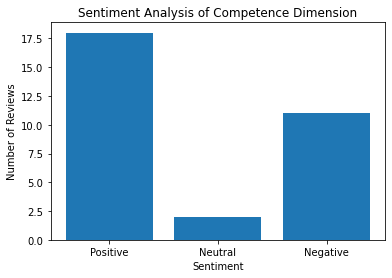

In [27]:
# Set the labels and values for the bar chart
labels = ['Positive', 'Neutral', 'Negative']
values = [18, 2, 11]

# Create the bar chart
plt.bar(labels, values)
plt.title("Sentiment Analysis of Competence Dimension")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the bar chart
plt.show()

# Dimensi Sophistication

In [43]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsoph1 = ["countless", "favorite", "world", "base", "based", "traveled", "iconic", "extravagant", "annual", "different", "glamorous"]
excluded_sentences = ["when you walk into the courtyard from the street, you feel like you've been transported to a different place & time."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsoph1:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

i’d try a different hotel though when we go back. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
my favorite concierge, kal naim, helped me arrange broadway tickets and dinner reservations before i arrived so when i landed, vacation began. {'neg': 0.0, 'neu': 0.875, 'pos': 0.125, 'compound': 0.4588} positive
- gym is small and without proper equipment (again, for a 800$ per night hotel)  long story short, spend your money in a different place. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
lotte is my favorite hotel in nyc. {'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'compound': 0.4588} positive
favorite hotel in nyc!! {'neg': 0.0, 'neu': 0.456, 'pos': 0.544, 'compound': 0.555} positive
favorite hotel highly recommended. {'neg': 0.0, 'neu': 0.282, 'pos': 0.718, 'compound': 0.624} positive
i would urge you to find a different place to stay in new york. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
this hotel is definitely our new favorite place

it's my husband's favorite hotel. {'neg': 0.0, 'neu': 0.571, 'pos': 0.429, 'compound': 0.4588} positive
it's our favorite hotel in nyc due to its convenient location, nice sized and clean rooms, and excellent customer service. {'neg': 0.0, 'neu': 0.567, 'pos': 0.433, 'compound': 0.9042} positive
we have been to new york many times and i always like to stay in a different hotel in a different part of the city. {'neg': 0.0, 'neu': 0.906, 'pos': 0.094, 'compound': 0.3612} positive
this is my new favorite hotel in nyc. {'neg': 0.0, 'neu': 0.7, 'pos': 0.3, 'compound': 0.4588} positive
this is an iconic nyc hotel with lovely rooms and a great location. {'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.836} positive
so we didn't have to wait in the long line in the lobby to check out, but for longer stays, i would look to find a different hotel. {'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'compound': 0.0129} positive
definitely one of my favorite hotel in the world!! {'neg': 0.0, 'neu': 0.5

In [44]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsoph2 = ["sophisticated", "exterior", "exquisite", "attractive", "impressive", "historical", "inviting", "suspect", "brilliant", "famed", "charming", "magic", "magical", "witching"]
excluded_sentences = ["when you walk into the courtyard from the street, you feel like you've been transported to a different place & time."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsoph2:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

known for its magical christmas decorations we had to book here. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
friendly and helpful staff, attractive well-sized room. {'neg': 0.0, 'neu': 0.31, 'pos': 0.69, 'compound': 0.836} positive
very sophisticated hotel with all the services that comes with it. {'neg': 0.0, 'neu': 0.72, 'pos': 0.28, 'compound': 0.5984} positive
fancy charming hotel, nice public spaces, nice rooms. {'neg': 0.0, 'neu': 0.347, 'pos': 0.653, 'compound': 0.8555} positive
new york city at christmas is a magical place and we enjoyed so many activities from ice skating in bryant park, to touring the statue of liberty, a walk in central park, broadway musicals and of course shopping. {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'compound': 0.7717} positive
it is a magical place to stay during the holiday season. {'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'compound': 0.4019} positive
very impressive hotel, gorgeous xmas decorations. {'neg': 0.0, 'neu': 0.337, 'pos

In [45]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsoph3 = ["seamless", "swift", "sandy", "frosty", "informative", "surly", "matt", "thorough", "understaffed", "personable", "smooth", "bland", "fluent", "quiet", "surly", "tranquil"]
excluded_sentences = ["when you walk into the courtyard from the street, you feel like you've been transported to a different place & time."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsoph3:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

many positives - quiet, excellent staff, large room. {'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'compound': 0.7964} positive
very nice room and quiet. {'neg': 0.0, 'neu': 0.564, 'pos': 0.436, 'compound': 0.4754} positive
we mostly were in the room to get ready or sleep, so everything that we care about--quiet room and a comfortable bed, this hotel had! {'neg': 0.0, 'neu': 0.703, 'pos': 0.297, 'compound': 0.8516} positive
i appreciate the very personable doormen that are so cheerful & helpful! {'neg': 0.0, 'neu': 0.46, 'pos': 0.54, 'compound': 0.8897} positive
very informative staff on the front desk and great service. {'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'compound': 0.6249} positive
beautiful corner room, comfortable, surprisingly quiet in a busy hotel in a busy city. {'neg': 0.0, 'neu': 0.539, 'pos': 0.461, 'compound': 0.8555} positive
quiet room. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
special thanks to taylor, who helped me prior to the stay by arranging a qu

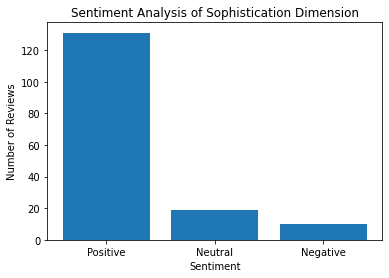

In [46]:
# Set the labels and values for the bar chart
labels = ['Positive', 'Neutral', 'Negative']
values = [131, 19, 10]

# Create the bar chart
plt.bar(labels, values)
plt.title("Sentiment Analysis of Sophistication Dimension")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the bar chart
plt.show()

# Dimensi Ruggedness

In [47]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordrug1 = ["indifferent", "personalized", "careful", "accurate", "boss", "friendlier", "appropriate", "certain", "slight", "game", "tough", "rugged", "bad", "hard", "baffling", "elusive", "problematic"]
excluded_sentences = ["when you walk into the courtyard from the street, you feel like you've been transported to a different place & time."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordrug1:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

thanks lotte and thanks dan the only thing that could be nicer is a bit more friendlier and smiling front desk staff! {'neg': 0.0, 'neu': 0.522, 'pos': 0.478, 'compound': 0.9387} positive
the front desk agent, norma tabora, was extremely helpful in helping us secure an appropriate room. {'neg': 0.0, 'neu': 0.62, 'pos': 0.38, 'compound': 0.788} positive
again, not a bad hotel, just not a great one! {'neg': 0.248, 'neu': 0.554, 'pos': 0.197, 'compound': -0.1867} negative
clean quiet, friendly staff, extremely well locted in manhattan, hard to beat this. {'neg': 0.075, 'neu': 0.481, 'pos': 0.444, 'compound': 0.7841} positive
staff a bit indifferent but it's nyc, right? {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.1027} negative
this is not a bad hotel. {'neg': 0.0, 'neu': 0.637, 'pos': 0.363, 'compound': 0.431} positive
 bottom line: i should have stayed where i have stayed before at the hampton inn manhattan @ 35th street/empire state building for a nicer, larger room with two

In [23]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordrug2 = ["inside", "natural", "public", "stylish", "common", "impressive", "cool", "inviting", "fancy", "peaceful", "crowded", "outdoor", "outside", "gold", "sumptuous", "galore"]
excluded_sentences = ["we had a great time staying here - the hotel has a lovely courtyard that is a really peaceful and comfortable place to relax and unwind after a busy day."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordrug2:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

we really are low key so don’t need a fancy room. {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353} negative
the views from our big, bright beautiful room were amazing and it was such a peaceful and super comfortable place to return to after the buzz!! {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.9705} positive
very cool place to get a drink before dinner! {'neg': 0.0, 'neu': 0.735, 'pos': 0.265, 'compound': 0.4376} positive
if you are a mlb baseball fan you may even catch your favorite team staying in this hotel as it is a common place for mlb teams to stay at when playing the yankees. {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.7269} positive
we were in town for a large conference and the experience we had at the palace made a huge difference for us, after exhausting days at the javits, we came back to the most peaceful, comfortable room and an incredibly warm, caring, and obliging staff. {'neg': 0.044, 'neu': 0.69, 'pos': 0.266, 'compound': 0.9108} p

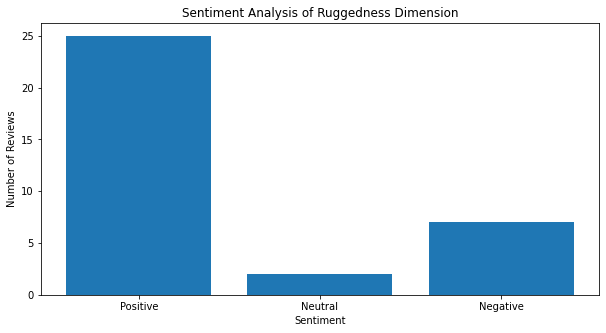

In [28]:
plt.figure(figsize=(10, 5))
# Set the labels and values for the bar chart
labels = ['Positive', 'Neutral', 'Negative']
values = [25, 2, 7]

# Create the bar chart
plt.bar(labels, values)
plt.title("Sentiment Analysis of Ruggedness Dimension")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the bar chart
plt.show()

# Dimensi Sustainability

In [19]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsust1 = ["goregeous", "decorated", "immacurate", "incredible", "spotless", "stunning", "spectacular"]
excluded_sentences = ["the courtyard offers a lovely place to sit and enjoy a drink outside."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsust1:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

not only is it the most stunning place but it has the kindest staff. {'neg': 0.0, 'neu': 0.87, 'pos': 0.13, 'compound': 0.2374} positive
i have to say, though, that the highlight was our visit to the stunning gold room. {'neg': 0.0, 'neu': 0.737, 'pos': 0.263, 'compound': 0.6124} positive
all this tremendous personal leadership and service in a stunning hotel that is a visual feast for any guest. {'neg': 0.0, 'neu': 0.874, 'pos': 0.126, 'compound': 0.3818} positive
so was everyone else, including the spectacular bellmen, the maids, and everyone else with whom we came into contact. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
it feels very welcoming here - a stunning place yet feeling like a home away from home due to everyone’s professional and very friendly approach. {'neg': 0.0, 'neu': 0.601, 'pos': 0.399, 'compound': 0.9059} positive
did my check in by a lovely lady (rebecca v.) who got me the most incredible room with a cathedral view. {'neg': 0.0, 'neu': 0.84, 'po

In [51]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsust2 = ["adorable", "expert", "continued", "kindly", "stressful", "assisted", "sorry", "addressed", "telling", "miserable", "direct", "big", "bountiful", "handsome", "giving", "liberal"]
excluded_sentences = ["when you walk into the courtyard from the street, you feel like you've been transported to a different place & time."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsust2:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

firstly what a hotel, great rooms, great staff, great stay, we stayed for 8 nights in december in a big room with a cathedral view and what a view, we didn’t try any of the restaurants as tried different breakfast joints every morning and there the obvious restaurants galore in manhattan. {'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'compound': 0.9231} positive
this is a big hotel with one working elevator, it would be wrong during normal times, but during a pandemic it’s unacceptable. {'neg': 0.232, 'neu': 0.768, 'pos': 0.0, 'compound': -0.7227} negative
large hotel, rooms are big for nyc, location excellent, is how it is described no disappointments here a big busy hotel that runs fairly well. {'neg': 0.0, 'neu': 0.727, 'pos': 0.273, 'compound': 0.8063} positive
big room, well furnished with one of the most amazing view on st. patrick cathedral and the 5th avenue. {'neg': 0.0, 'neu': 0.733, 'pos': 0.267, 'compound': 0.7346} positive
the views from our big, bright beautiful room were amaz

i've never stayed in a room that big in nyc before. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
all in all a nice quite big hotel. {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'compound': 0.4215} positive
great big, comfortable bed and big, clean bathroom. {'neg': 0.0, 'neu': 0.331, 'pos': 0.669, 'compound': 0.8779} positive
great big, comfortable bed and big, clean bathroom. {'neg': 0.0, 'neu': 0.331, 'pos': 0.669, 'compound': 0.8779} positive
big room. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
big windows with great views. {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6249} positive
big room. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
we preferred a midtown location, and when i found a terrific (non-refundable) rate from the new york palace, i called the hotel direct to book. {'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'compound': 0.4767} positive
Total positif: 42
Total negatif: 2
Total neutral: 10


In [22]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsust3 = ["nightly", "strong", "same", "inclusive", "acceptable", "nuts", "considered", "surprising", "increased", "fair", "reasonable", "bonnie", "average", "mediocre", "honest"]
excluded_sentences = ["when you walk into the courtyard from the street, you feel like you've been transported to a different place & time."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsust3:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

then an asian lady brought us a key that was to the same room we were trying to get out of. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
my normal 10 day trip was now 15 days and i was a little nervous...how would i feel about being “stuck” in the same hotel for more than 2 weeks. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
the front desk attendant gave us the same room at a great rate. {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.6249} positive
i wanted to make sure she had no issues staying in the same room and also not haggled for payment when cc was in my name. {'neg': 0.077, 'neu': 0.842, 'pos': 0.081, 'compound': 0.0258} positive
 the rooms are much larger than the average ny hotel room, but feel a little dated compared to some of the hotels in the area that have had recent renovations. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
new room - same moldy bathroom smell 5. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 

In [53]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsust4 = ["same", "seasonal", "angry", "minimum", "longer", "considered", "concerned", "cut", "needless", "significant", "aware", "mindful"]
excluded_sentences = ["when you walk into the courtyard from the street, you feel like you've been transported to a different place & time."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsust4: 
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

then an asian lady brought us a key that was to the same room we were trying to get out of. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
my normal 10 day trip was now 15 days and i was a little nervous...how would i feel about being “stuck” in the same hotel for more than 2 weeks. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
the front desk attendant gave us the same room at a great rate. {'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.6249} positive
i wanted to make sure she had no issues staying in the same room and also not haggled for payment when cc was in my name. {'neg': 0.077, 'neu': 0.842, 'pos': 0.081, 'compound': 0.0258} positive
new room - same moldy bathroom smell 5. {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0} neutral
when we extended our stay for a third night, miles made it possible for us to stay in the same room and avoid any disruption to our already packed schedule. {'neg': 0.144, 'neu': 0.856, 'pos': 0.0, 'compound':

In [24]:
positive_count = 0
negative_count = 0
neutral_count = 0
wordsust5 = ["fab", "classy", "sumptuous", "stylish", "tidy", "tasteful", "inviting", "opulent", "shiny", "impressive", "peaceful"]
excluded_sentences = ["we had a great time staying here - the hotel has a lovely courtyard that is a really peaceful and comfortable place to relax and unwind after a busy day."]
for review in df['content']:
  doc = nlp(review)
  for token in doc:
    if token.text in wordsust5:
        if token.pos_ == "ADJ":
            if token.head.text == "hotel" or token.head.text == "property" or token.head.text == "place" or token.head.text == "palace" or token.head.text == "lotte" or token.head.text == "decorations" or token.head.text == "exterior" or token.head.text == "interior" or token.head.text == "gym" or token.head.text == "architecture" or token.head.text == "room" or token.head.text == "bedroom" or token.head.text == "bed" or token.head.text == "windows" or token.head.text == "toiletries" or token.head.text == "bathroom" or token.head.text == "mattress" or token.head.text == "furniture" or token.head.text == "rooftop" or token.head.text == "guestrooms" or token.head.text == "staff" or token.head.text == "doormen" or token.head.text == "bellmen" or token.head.text == "concierge" or token.head.text == "members" or token.head.text == "employees" or token.head.text == "bartenders" or token.head.text == "bellman" or token.head.text == "doorman" or token.head.text == "captain" or token.head.text == "maids" or token.head.text == "housekeeping":
                if token.sent.text not in excluded_sentences:
            # Calculate the sentiment scores for the sentence
                    scores = analyzer.polarity_scores(token.sent.text)
                    if scores['compound'] > 0:
                        sentiment = 'positive'
                        positive_count += 1
                    elif scores['compound'] < 0:
                        sentiment = 'negative'
                        negative_count += 1
                    else:
                        sentiment = 'neutral'
                        neutral_count += 1
            # Print the sentiment scores for the sentence
                    print((token.sent.text), (scores), (sentiment))
print(f"Total positif: {positive_count}")
print(f"Total negatif: {negative_count}")
print(f"Total neutral: {neutral_count}")

the views from our big, bright beautiful room were amazing and it was such a peaceful and super comfortable place to return to after the buzz!! {'neg': 0.0, 'neu': 0.481, 'pos': 0.519, 'compound': 0.9705} positive
the fabulous coffee, a perfect blueberry no-jito, and lovely libations would have been enough to bring us back but nicola and melissa made us feel as though we were dining among old friends in this magnificently opulent gold room. {'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.9531} positive
we were in town for a large conference and the experience we had at the palace made a huge difference for us, after exhausting days at the javits, we came back to the most peaceful, comfortable room and an incredibly warm, caring, and obliging staff. {'neg': 0.044, 'neu': 0.69, 'pos': 0.266, 'compound': 0.9108} positive
very impressive hotel, gorgeous xmas decorations. {'neg': 0.0, 'neu': 0.337, 'pos': 0.663, 'compound': 0.8341} positive
views over the cathedral and superb, the ar

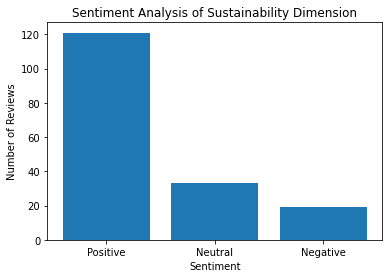

In [29]:
# Set the labels and values for the bar chart
labels = ['Positive', 'Neutral', 'Negative']
values = [121, 33, 19]

# Create the bar chart
plt.bar(labels, values)
plt.title("Sentiment Analysis of Sustainability Dimension")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the bar chart
plt.show()

# Frekuensi Rekapan Seluruh Dimensi

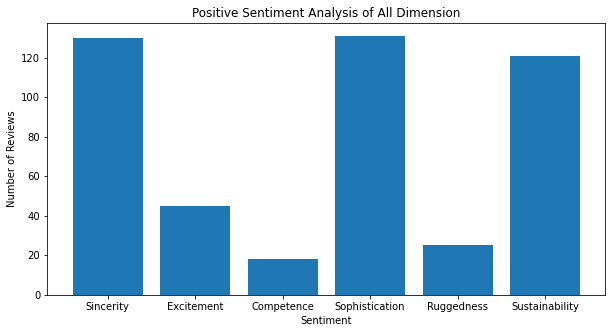

In [30]:
plt.figure(figsize=(10, 5))

# Set the labels and values for the bar chart
labels = ['Sincerity', 'Excitement', 'Competence', 'Sophistication', 'Ruggedness', 'Sustainability']
values = [130, 45, 18, 131, 25, 121]

# Create the bar chart
plt.bar(labels, values)
plt.title("Positive Sentiment Analysis of All Dimension")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the bar chart
plt.show()

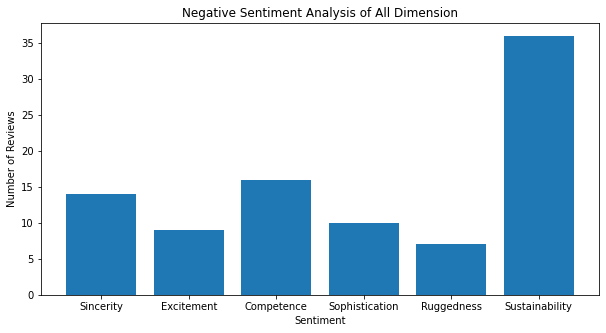

In [60]:
plt.figure(figsize=(10, 5))

# Set the labels and values for the bar chart
labels = ['Sincerity', 'Excitement', 'Competence', 'Sophistication', 'Ruggedness', 'Sustainability']
values = [14, 9, 16, 10, 7, 36]

# Create the bar chart
plt.bar(labels, values)
plt.title("Negative Sentiment Analysis of All Dimension")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the bar chart
plt.show()

In [ ]:
plt.figure(figsize=(10, 5))

# Set the labels and values for the bar chart
labels = ['Sincerity', 'Excitement', 'Competence', 'Sophistication', 'Ruggedness', 'Sustainability']
values = [10897, 4826, 3729, 2624, 1967, 2646]

# Create the bar chart
plt.bar(labels, values)
plt.title("Negative Sentiment Analysis of All Dimension")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the bar chart
plt.show()

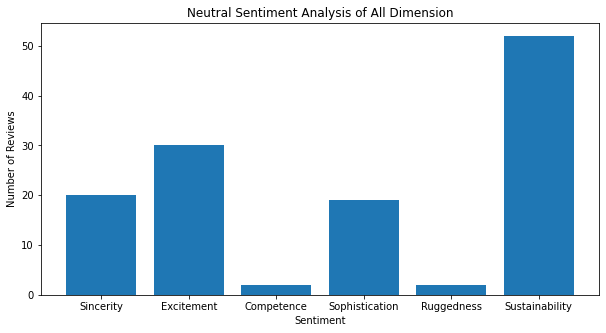

In [61]:
plt.figure(figsize=(10, 5))

# Set the labels and values for the bar chart
labels = ['Sincerity', 'Excitement', 'Competence', 'Sophistication', 'Ruggedness', 'Sustainability']
values = [20, 30, 2, 19, 2, 52]

# Create the bar chart
plt.bar(labels, values)
plt.title("Neutral Sentiment Analysis of All Dimension")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

# Show the bar chart
plt.show()